In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
import time 

In [18]:
# Khởi tạo Spark session
spark = SparkSession.builder.appName("RandomForestKFold").getOrCreate()
df = spark.read.csv("Data/Output.csv/part-00000-7297af00-74fe-4474-b6cd-e90221265428-c000.csv", header=True, inferSchema=True)

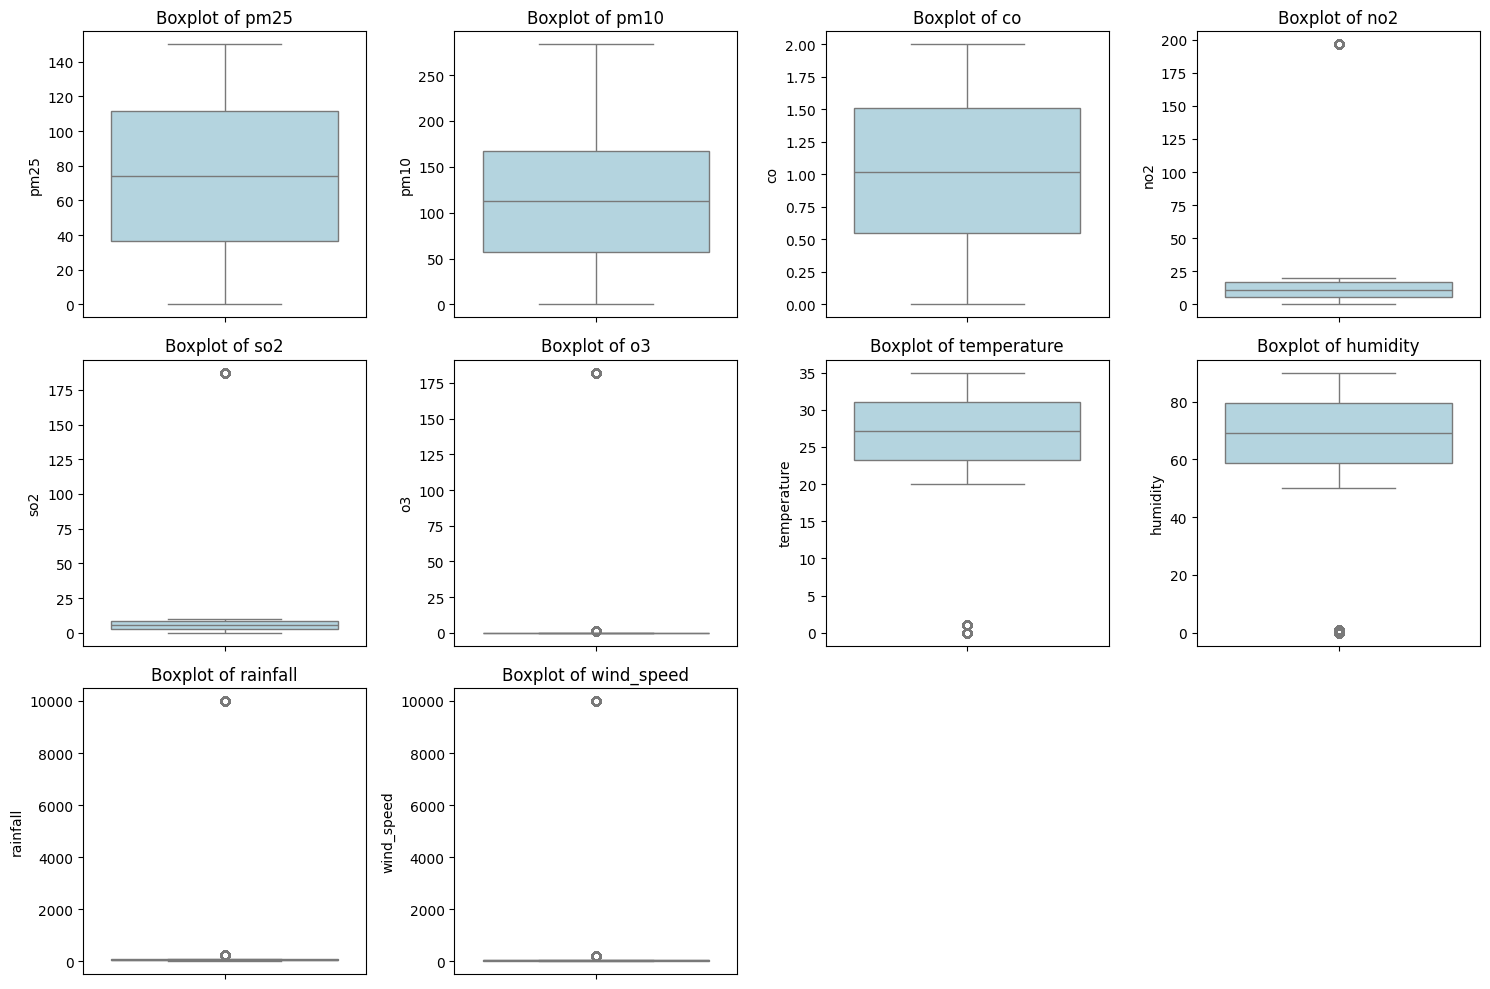

In [19]:
pandas_df = df.toPandas()

features = ["pm25", "pm10", "co", "no2", "so2", "o3", "temperature", "humidity", "rainfall", "wind_speed"]

plt.figure(figsize=(15,10))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=pandas_df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

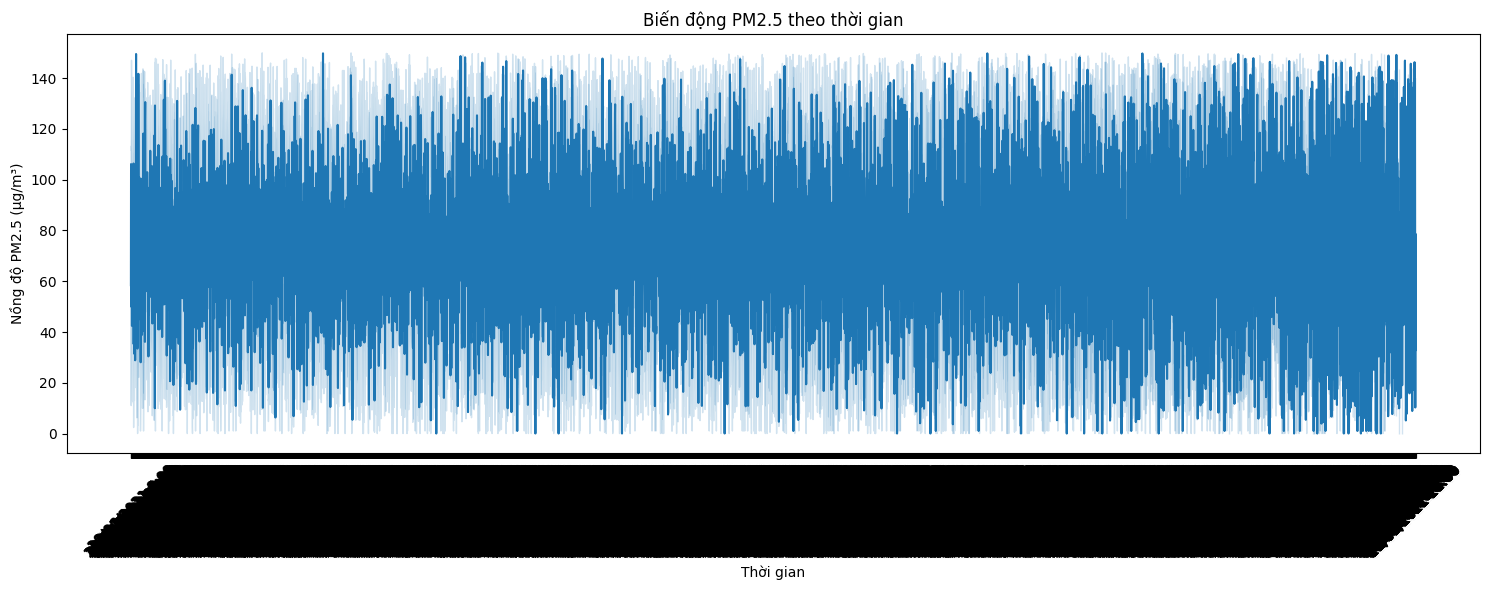

In [21]:
#

# Vẽ biến động PM2.5 theo thời gian
plt.figure(figsize=(15,6))
sns.lineplot(x='date', y='pm25', data=pandas_df)
plt.title('Biến động PM2.5 theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Nồng độ PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\1227836609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\1227836609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\1227836609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
C:\Users\Admin\AppData

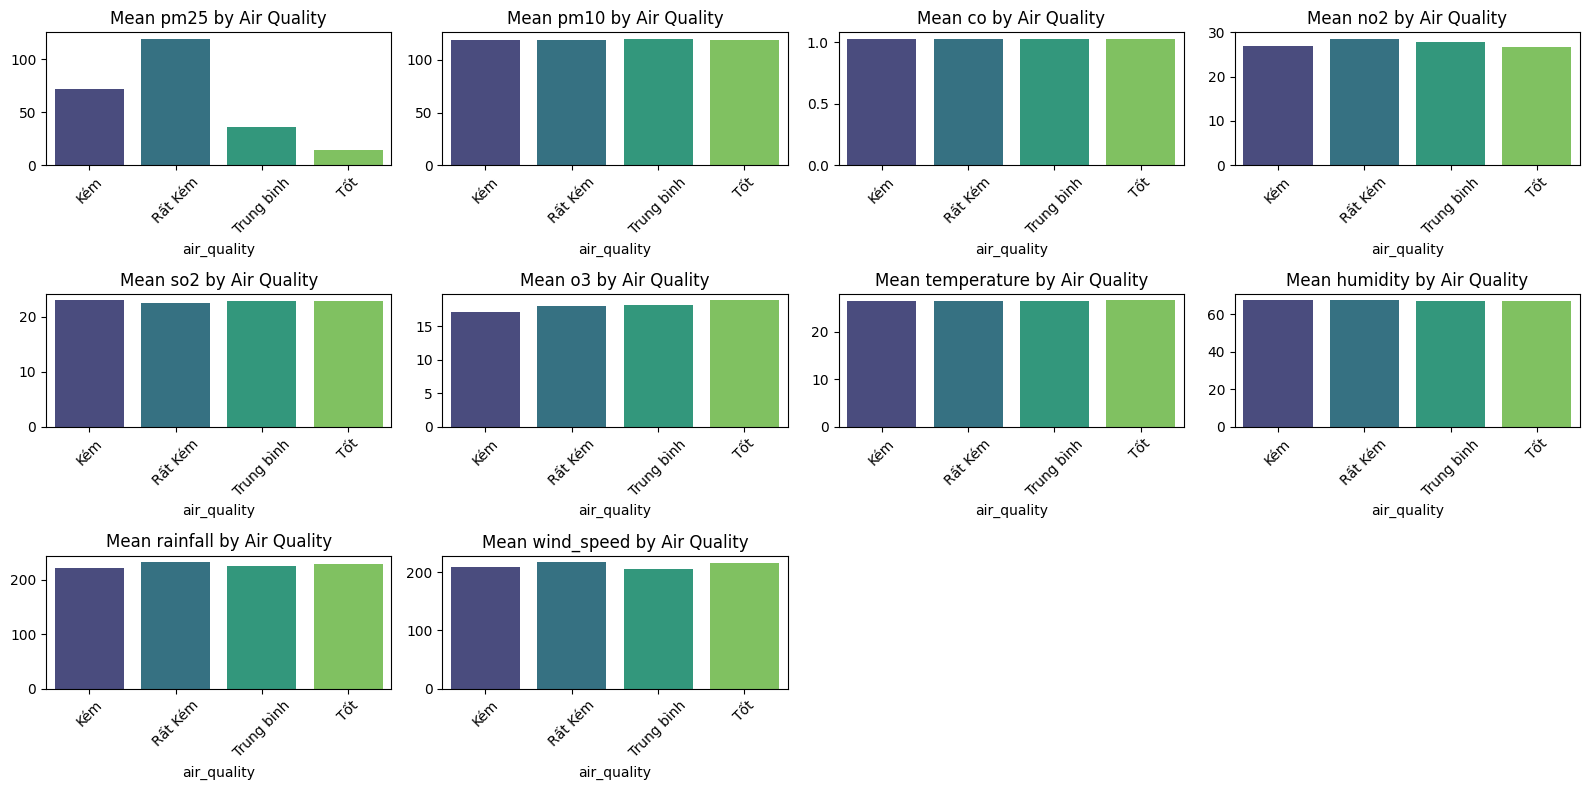

In [ ]:
# 2. Barplot trung bình từng chỉ số theo từng loại air_quality
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    mean_values = pandas_df.groupby('air_quality')[feature].mean().sort_index()
    sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
    plt.title(f'Mean {feature} by Air Quality')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


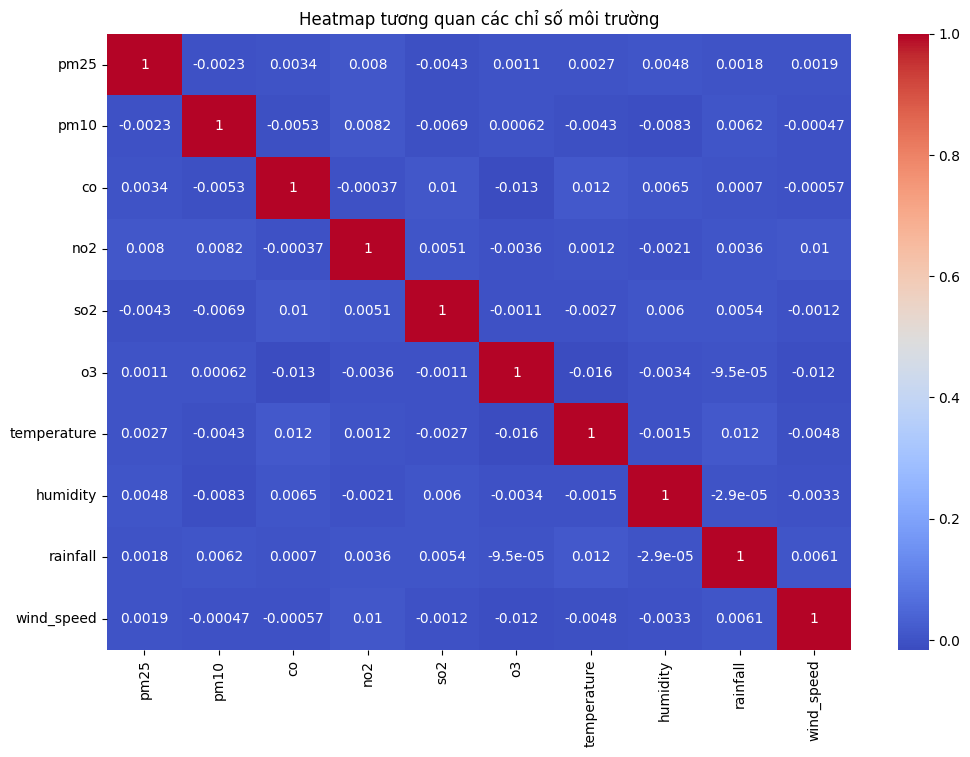

In [ ]:
plt.figure(figsize=(12,8))
corr = pandas_df[['pm25', 'pm10', 'co', 'no2', 'so2', 'o3', 'temperature', 'humidity', 'rainfall', 'wind_speed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap tương quan các chỉ số môi trường')
plt.show()

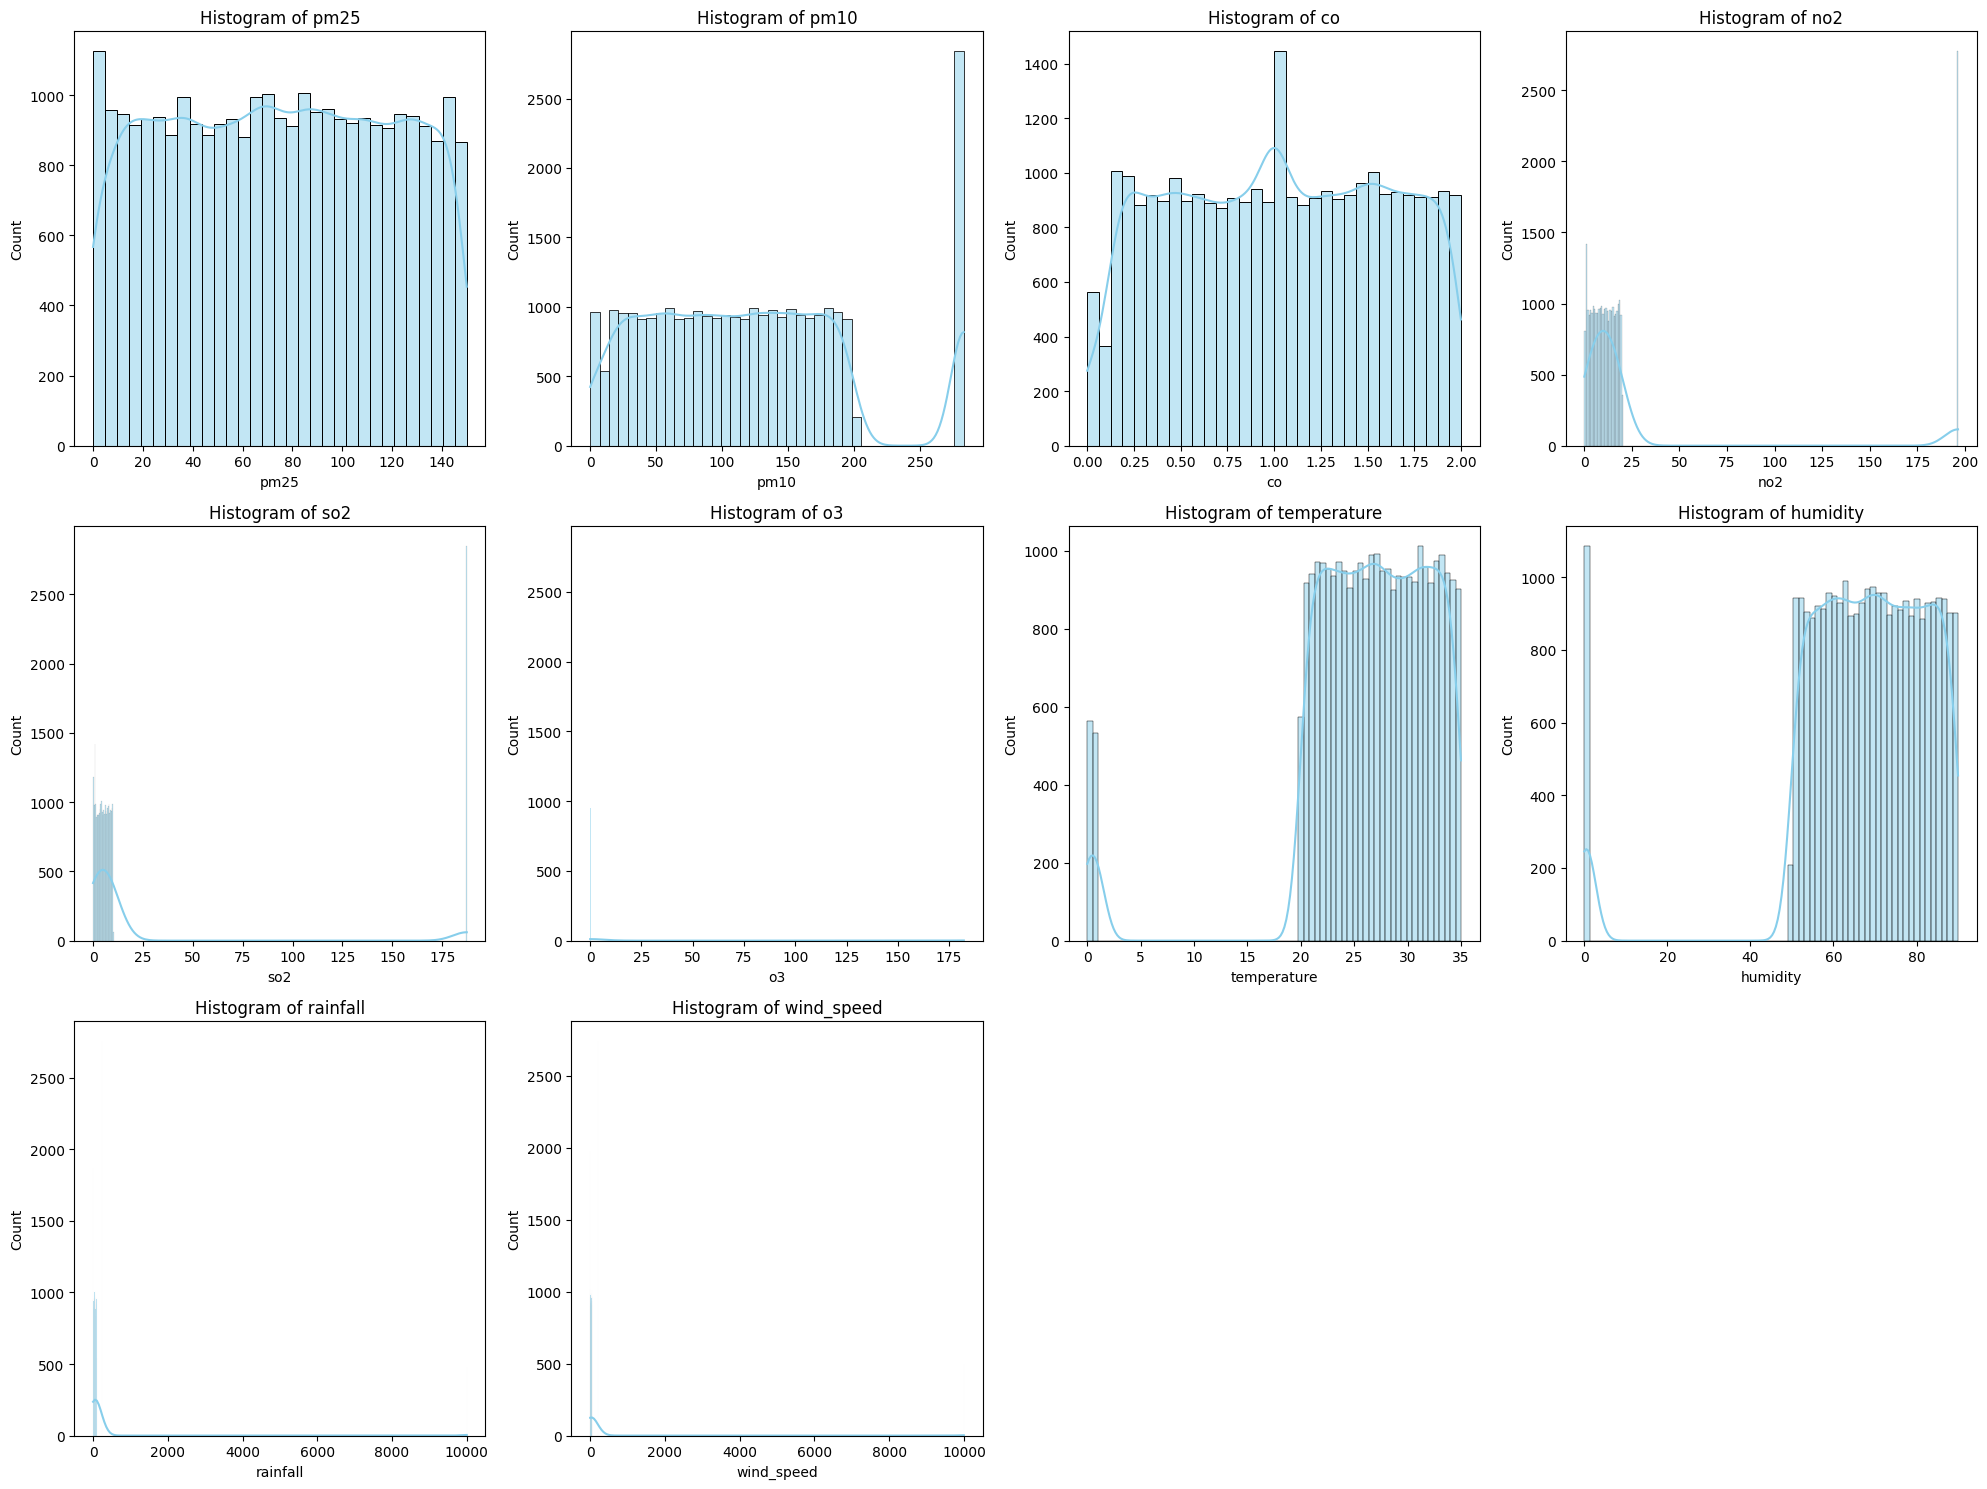

In [ ]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(pandas_df[feature], kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\2289483042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='air_quality', data=pandas_df, palette='Set2')


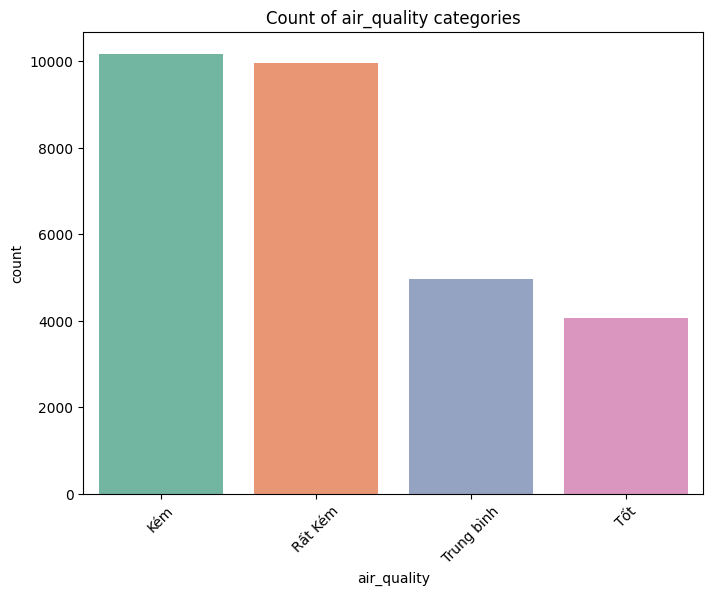

In [ ]:
# 3. Biểu đồ count plot cho nhãn phân loại air_quality
plt.figure(figsize=(8,6))
sns.countplot(x='air_quality', data=pandas_df, palette='Set2')
plt.title('Count of air_quality categories')
plt.xticks(rotation=45)
plt.show()

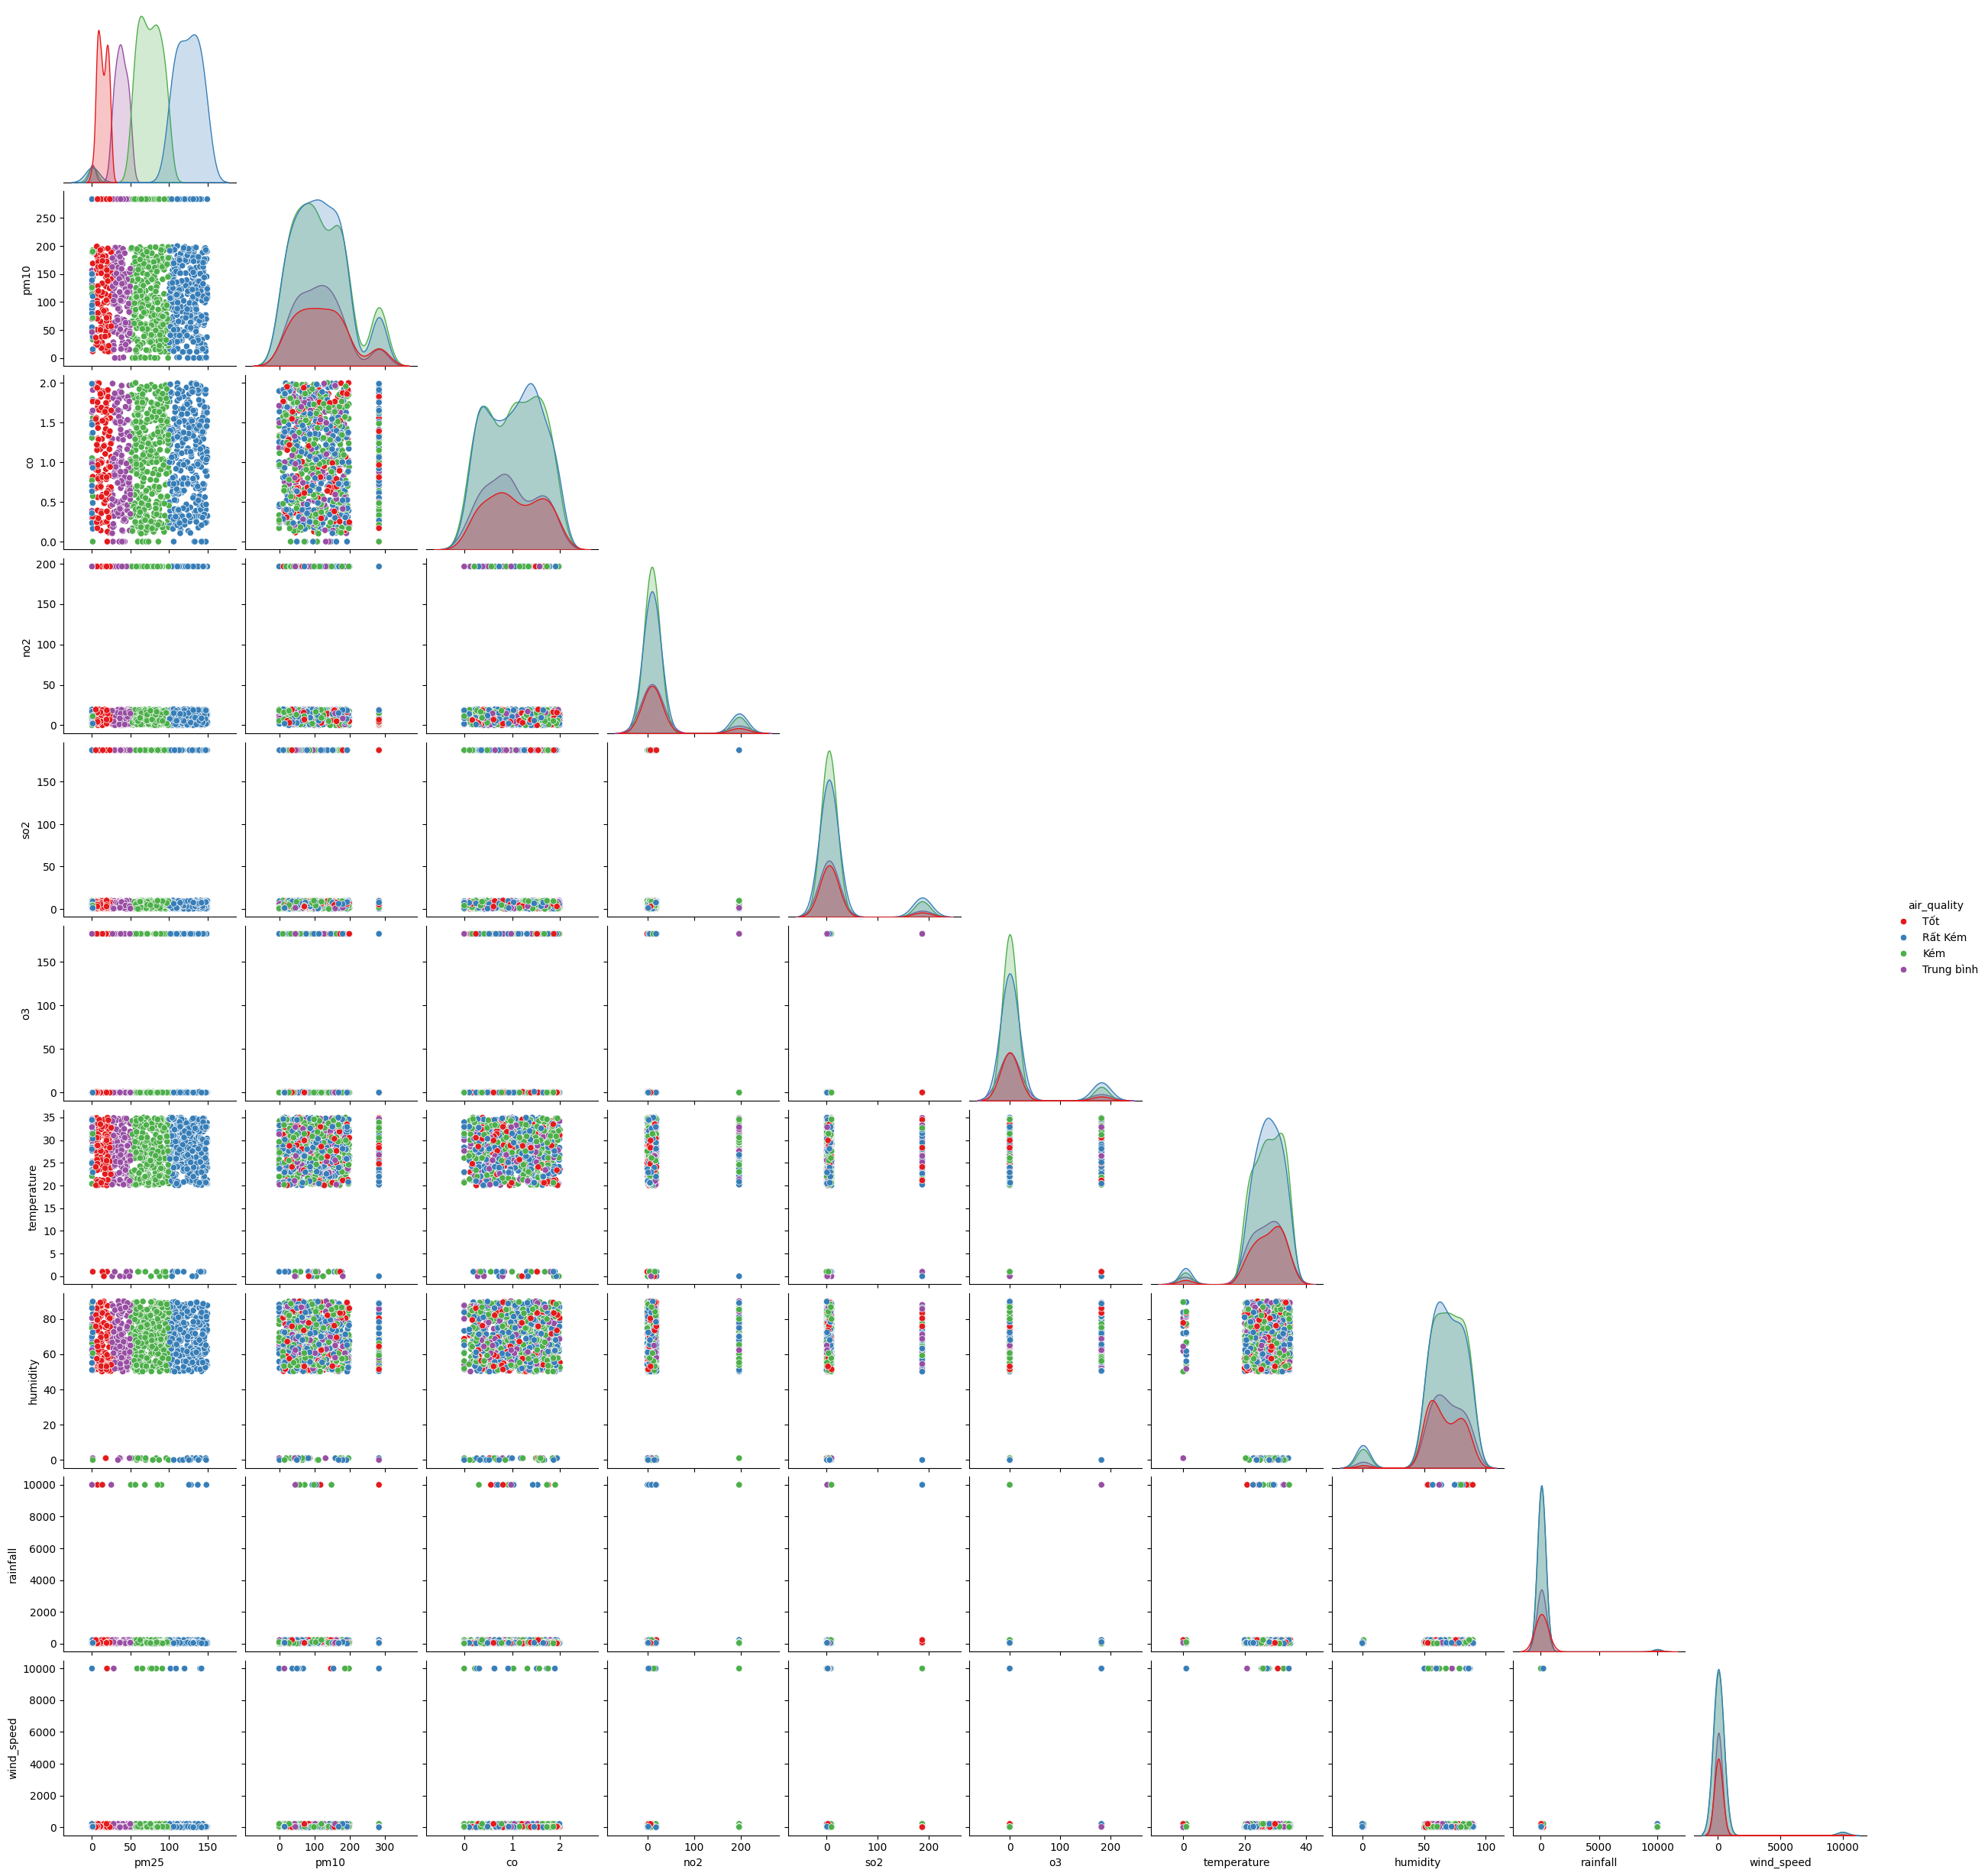

In [ ]:
# 4. Biểu đồ scatter matrix để xem quan hệ giữa các biến numeric (lấy mẫu nếu dữ liệu lớn)
sample_df = pandas_df.sample(n=1000, random_state=42)  # lấy mẫu nếu dữ liệu quá lớn
sns.pairplot(sample_df, vars=features, hue='air_quality', palette='Set1', diag_kind='kde', corner=True)
plt.show()